## 简答题

1. Glorot初始化和He初始化为了解决什么问题

梯度消失和梯度爆炸

2. 是否可以将所有权重初始化为相同的值（只要该值是使用He初始化随机选择的）

不可以，如果都相同，前向传播过程中该层神经元将产生相同的输出

3. 将偏置项初始化为0可以吗

可以

4. 总结下讨论过的激活函数，并讲述在什么情况下使用它们

ReLU 简单任务
Leaky ReLU 解决ReLU死亡神经元问题
ELU 缓解梯度消失问题
SELU 用于自归一化，能够自动保持每层输出均值为0，标准差为1
GELU 复杂任务表现很好
Swish 复杂任务的默认选择
Mish 它是ReLU的平滑、非凸和非单调变体，对于非常复杂的任务，甚至可以尝试使用具有可学习的β参数的参数化Swish。Mish可能会带来更好的结果，但它需要更多的计算量。

5. 如果在使用SGD优化器时将momentum超参数设置得太接近1（例如0.99999)会发生什么情况

可能会陷入局部最优

6. 列举三种能产生稀疏模型得方法

Dropout
强L1正则化
剪枝

7. dropout会减慢训练速度吗？它会减慢推理（即对新实例进行预测）速度吗？MC dropout呢？

训练速度会变慢，但是预测速度不会变慢。MC dropout会减慢推理速度


## 编程题

在CIFAR10图像数据集上练习训练深度神经网络：

CIFAR-10数据集，又称加拿大高等研究院数据集（Canadian Institute for Advanced Research）是一个常用于训练机器学习和计算机视觉算法的图像集合。它是最广泛使用的机器学习研究数据集之一。

CIFAR-10数据集包含60,000张32×32像素的彩色图像，分为10个不同的类别。这10个类别分别是飞机、汽车、鸟类、猫、鹿、狗、青蛙、马、船和卡车，每个类别有6,000张图片。

飞机、汽车、鸟类、猫、鹿、狗、青蛙、马、船和卡车 对应的分类编码是0，1，2，3，4，5，6，7，8，9


1. 构建一个DNN，使其包含20个隐藏层，每个隐藏层包含100个神经元。使用He初始化和Swish激活函数。
2. 使用Nadam优化和早停技术，在CIFAR10数据集上训练网络。可以使用tf.keras.datasets.cifar10.load_data()加载数据。该数据集由10个类别的60000幅32×32像素的彩色图像（用于训练的50000个，用于测试的10000个）组成，因此需要一个具有10个神经元的softmax输出层。记住，每次更改模型的架构或超参数时，都要找寻正确的学习率。
3. 尝试添加批量归一化并比较学习曲线：收敛速度是否比以前快？会产生更好的模型吗？它如何影响训练速度？
4. 尝试用SELU替换批量归一化，并进行必要的调整以确保网络是自归一化的（即归一化输入特征，使用LeCun正态初始化，确保DNN仅仅包含一系列的密集层等）
5. 尝试使用Alpha dropout正则化模型。然后，在不重新训练模型的情况下，看看是否可以使用MC dropout获得更好的精度。
6. 使用1周期调度来重新训练模型，看看它是否可以提高训练速度和模型精度。

加载数据的代码： tf.keras.datasets.cifar10.load_data()

下载失败的解决方案：
1. 下载文件： cifar-10-python.tar.gz （会把文件发群里）
2. 将文件 cifar-10-python.tar.gz 重命名为 cifar-10-batches-py.tar.gz
3. 并复制到类似 C:\Users\某个用户名或者管理员\.keras\datasets 的路径。将 某个用户名或者管理员 替换为你的用户名。如果是 Linux/Macos 系统，则应为 /home/某个用户名或者管理员/.keras/datasets。

In [7]:
import keras.optimizers
# 加载数据的代码
import tensorflow as tf
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
# 查看数据集形状
print("训练集图片形状:", X_train_full.shape) # 应该是 (50000, 32, 32, 3)
print("训练集标签形状:", y_train_full.shape) # 应该是 (50000, 1)

训练集图片形状: (50000, 32, 32, 3)
训练集标签形状: (50000, 1)


In [8]:
# 按0-9顺序定义类别：飞机、汽车、鸟类、猫、鹿、狗、青蛙、马、船和卡车
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

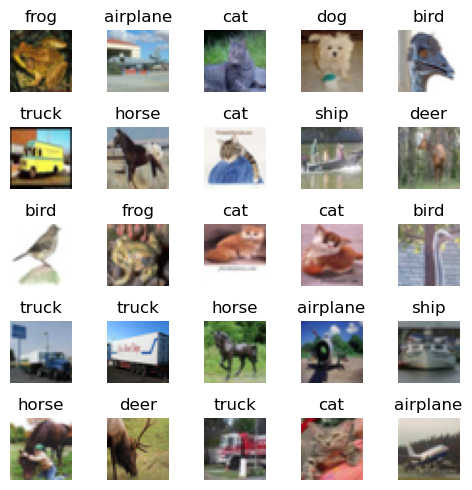

In [9]:
import numpy as np
import matplotlib.pyplot as plt

nrows = 5
ncols = 5

plt.figure(figsize=(5, 5))


random_indices = np.random.choice(len(X_train_full), nrows * ncols, replace=False)  # 无放回随机抽索引

for i, idx in enumerate(random_indices):
    plt.subplot(nrows, ncols, i+1)
    img = X_train_full[idx]
    label = y_train_full[idx, 0]
    plt.imshow(img)
    plt.title(class_names[label])
    plt.axis('off')

# 调整子图之间的间距，防止标题等重叠
plt.tight_layout()
plt.show()

In [10]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(tf.keras.layers.Dense(100, activation='swish', kernel_initializer='he_normal'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True, monitor='val_loss')
history = model.fit(X_train_full, y_train_full, epochs=100, validation_data=(X_test, y_test), callbacks=[early_stopping_cb])


Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.2089 - loss: 3.6863 - val_accuracy: 0.2549 - val_loss: 1.9831
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.2596 - loss: 1.9837 - val_accuracy: 0.2610 - val_loss: 1.9643
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.2836 - loss: 1.9202 - val_accuracy: 0.2915 - val_loss: 1.8842
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.2903 - loss: 1.9021 - val_accuracy: 0.2955 - val_loss: 1.9276
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.2952 - loss: 1.8870 - val_accuracy: 0.2942 - val_loss: 1.8752
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.2826 - loss: 1.9146 - val_accuracy: 0.3097 - val_loss: 1.8551
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.2921 - loss: 1.8951 - val_accuracy: 0.3007 - val_loss: 1.8727
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.2975 

In [14]:
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model2.add(tf.keras.layers.Dense(100, kernel_initializer='he_normal'))
    model2.add(tf.keras.layers.BatchNormalization())
    model2.add(tf.keras.layers.Activation('swish'))
model2.add(tf.keras.layers.Dense(10, activation='softmax'))
model2.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [15]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True, monitor='val_loss')
history = model2.fit(X_train_full, y_train_full, epochs=100, validation_data=(X_test, y_test), callbacks=[early_stopping_cb])

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.2933 - loss: 1.9506 - val_accuracy: 0.2835 - val_loss: 2.0579
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.3788 - loss: 1.7299 - val_accuracy: 0.3318 - val_loss: 1.8671
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.4119 - loss: 1.6497 - val_accuracy: 0.3568 - val_loss: 1.7665
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.4375 - loss: 1.5800 - val_accuracy: 0.4154 - val_loss: 1.6206
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.4569 - loss: 1.5284 - val_accuracy: 0.3824 - val_loss: 1.7675
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.4725 - loss: 1.4804 - val_accuracy: 0.3761 - val_loss: 1.8279
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.4903 - loss: 1.4352 - val_accuracy: 0.4597 - val_loss: 1.5073
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.5058 -

In [16]:
model3 = tf.keras.models.Sequential()
model3.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model3.add(tf.keras.layers.Dense(100, kernel_initializer='lecun_normal'))
    model3.add(tf.keras.layers.Activation('selu'))

model3.add(tf.keras.layers.Dense(10, activation='softmax'))
model3.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True, monitor='val_loss')
history = model3.fit(X_train_full, y_train_full, epochs=100, validation_data=(X_test, y_test), callbacks=[early_stopping_cb])

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.2287 - loss: 2.0563 - val_accuracy: 0.2756 - val_loss: 1.9412
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.2832 - loss: 1.9058 - val_accuracy: 0.2778 - val_loss: 1.8974
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.2971 - loss: 1.8747 - val_accuracy: 0.3101 - val_loss: 1.8599
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3079 - loss: 1.8602 - val_accuracy: 0.3457 - val_loss: 1.7826
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3299 - loss: 1.8072 - val_accuracy: 0.3522 - val_loss: 1.7565
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3450 - loss: 1.7723 - val_accuracy: 0.3421 - val_loss: 1.7650
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3571 - loss: 1.7467 - val_accuracy: 0.3525 - val_loss: 1.7363
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3635 - loss: 

In [21]:
model4 = tf.keras.models.Sequential()
model4.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model4.add(tf.keras.layers.Dense(100, kernel_initializer='lecun_normal'))
    model4.add(tf.keras.layers.AlphaDropout(0.2))
    model4.add(tf.keras.layers.Activation('selu'))
model4.add(tf.keras.layers.Dense(10, activation='softmax'))
model4.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
class MCDropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [20]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True, monitor='val_loss')
history = model4.fit(X_train_full, y_train_full, epochs=100, validation_data=(X_test, y_test), callbacks=[early_stopping_cb])


Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.1539 - loss: 2.2315 - val_accuracy: 0.1129 - val_loss: 3.1773
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1718 - loss: 2.1251 - val_accuracy: 0.1629 - val_loss: 3.1775
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1742 - loss: 2.1182 - val_accuracy: 0.1191 - val_loss: 3.2270
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1682 - loss: 2.1370 - val_accuracy: 0.0941 - val_loss: 4.5133
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1725 - loss: 2.1276 - val_accuracy: 0.1195 - val_loss: 3.2984
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1769 - loss: 2.1038 - val_accuracy: 0.1416 - val_loss: 3.1197
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1448 - loss: 2.2343 - val_accuracy: 0.1000 - val_loss: 8.3297
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1517 - loss: 2

In [22]:
model4.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0978 - loss: 3.4711


[3.4711270332336426, 0.09780000150203705]

In [23]:
import numpy as np

y_probas = np.stack([model4(X_test, training=True) for sample in range(100)])
y_proba = y_probas.mean(axis=0)

In [24]:
y_proba

array([[0.10171523, 0.09813363, 0.11957739, ..., 0.09199432, 0.11061135,
        0.09808878],
       [0.10698161, 0.13404337, 0.09202348, ..., 0.10534744, 0.10099015,
        0.0900756 ],
       [0.08905095, 0.10528779, 0.0926172 , ..., 0.13029747, 0.10358602,
        0.08754274],
       ...,
       [0.08716626, 0.09896818, 0.09720623, ..., 0.0931682 , 0.09285452,
        0.11097013],
       [0.12201152, 0.09827185, 0.09251226, ..., 0.08394302, 0.09396462,
        0.09851671],
       [0.07569928, 0.11500957, 0.097854  , ..., 0.11419419, 0.11054288,
        0.10415243]], dtype=float32)

In [25]:
np.mean(np.argmax(y_proba, axis=1) == y_test.flatten())

0.0953